In [1]:
# %%
import pandas as pd
import os.path as osp
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

TNSEP = 'TNsep'
SEP = 'Standalone'
HALF = 'Half-half'
methods = {SEP:'Normal_tiles_from_normal_slides',
           HALF:'Half_normal_tiles_from_tumor_slides'}
VGG, VGGs = 'vgg19', 'VGG19'

In [30]:
# %%
### get all model results
result_vgg = '/users/PAS1575/chen8028/Pathology/individual_mask/non_overlap_tiles/vgg19_testing_previous'
result_vgg_expanded = '/users/PAS1575/chen8028/Pathology/individual_mask/non_overlap_tiles/vgg19_testing'

result_all_paths = []
other_cnt = 0
for res_folder in [result_vgg, result_vgg_expanded]:
    result_files = glob.glob(osp.join(res_folder, '*_report.csv'))
    for result_f in result_files:
        if 'scaled' in result_f:  # do not use 'scaled' models
            continue
        if 'from_gaze' in result_f:  # do not include "normal from gaze" models here
            continue
        result_all_paths.append(result_f)
print(other_cnt)

### extract and save prediction results
res = []
for result_f in result_all_paths:
    if VGG in result_f:
        model = VGGs
    else:
        print(result_f, 'not in model list, skip')
        continue
    
    if TNSEP in result_f:
        method = SEP
        method_str = methods[SEP]
    else:
        print('not TNsep, skip')
        continue

    segs = osp.basename(result_f).split('_s')
    case = segs[0].replace('TNsep_','')
    
    if 'tumor' in result_f:
        case_type = 'Fixation-reduction (expanded mask)'
        thresh = '0.3'  # only used 0.3_s26 data in generating expanded mask
    elif 'small' in result_f:
        case_type = 'Fixation-reduction (large)'
        thresh = segs[0].split('_')[-1]
    elif '20test' in result_f:
        case_type = 'Fixation-reduction (small)'
        thresh = segs[0].split('_')[-1]
    else:
        continue

    seed = segs[1].split('_')[0]
    df = pd.read_csv(result_f)
    accu = df['precision'].values[2]    # this is accuracy
    f1score = df['f1-score'].values[4]  # 3 macro avg, 4 weighted avg
    sensitivity = df['recall'].values[1]
    specificity = df['recall'].values[0]

    res.append([model, method, method_str, case_type, thresh, case, seed, 'accuracy', accu])
    res.append([model, method, method_str, case_type, thresh, case, seed, 'f1-score', f1score])
    res.append([model, method, method_str, case_type, thresh, case, seed, 'sensitivity', sensitivity])
    res.append([model, method, method_str, case_type, thresh, case, seed, 'specificity', specificity])

df_res = pd.DataFrame(res, columns=['model','method','method_str','case_type','threshold','case','seed','metric','value'])

df_res.to_csv('results/new_results_summary.csv', index=False)
df_res.sort_values(['case_type','seed'], inplace=True)
df_res[df_res['metric']=='f1-score']

0


,model,method,method_str,case_type,threshold,case,seed,metric,value
33,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (expanded mask),0.3,tumor,16,f1-score,0.897413
29,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (expanded mask),0.3,tumor,26,f1-score,0.902726
25,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (expanded mask),0.3,tumor,6,f1-score,0.894388
5,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (large),0.3,0.3,16,f1-score,0.872400
9,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (large),0.3,0.3,26,f1-score,0.862854
1,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (large),0.3,0.3,6,f1-score,0.847244
13,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (small),0.3,20test_0.3,1,f1-score,0.702059
17,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (small),0.3,20test_0.3,22,f1-score,0.699168
21,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (small),0.3,20test_0.3,42,f1-score,0.656231


In [23]:
# %%
### Get results from previous study and merge them
df_pre = pd.read_csv('/users/PAS1575/chen8028/Pathology/patchCodeNew/results/exp1_results_summary.csv').fillna('')
df_pre = df_pre[(df_pre['model']=='VGG19') & (df_pre['method']=='Standalone')]
df_pre = df_pre[df_pre['case_type'].str.contains('Baseline') | df_pre['case_type'].str.contains('Random')]
df_pre[df_pre['metric']=='f1-score']

,model,method,method_str,case_type,threshold,case,seed,metric,value
1623,VGG19,Standalone,Normal_tiles_from_normal_slides,Baseline-large,,Baseline-large,16,f1-score,0.934388
1624,VGG19,Standalone,Normal_tiles_from_normal_slides,Baseline-large,,Baseline-large,26,f1-score,0.915606
1625,VGG19,Standalone,Normal_tiles_from_normal_slides,Baseline-large,,Baseline-large,6,f1-score,0.922643
1635,VGG19,Standalone,Normal_tiles_from_normal_slides,Baseline-small,,Baseline-small,16,f1-score,0.834178
1636,VGG19,Standalone,Normal_tiles_from_normal_slides,Baseline-small,,Baseline-small,26,f1-score,0.692171
1637,VGG19,Standalone,Normal_tiles_from_normal_slides,Baseline-small,,Baseline-small,6,f1-score,0.813090
1755,VGG19,Standalone,Normal_tiles_from_normal_slides,Random-large,,Random-large,16,f1-score,0.678783
1756,VGG19,Standalone,Normal_tiles_from_normal_slides,Random-large,,Random-large,26,f1-score,0.824406
1757,VGG19,Standalone,Normal_tiles_from_normal_slides,Random-large,,Random-large,6,f1-score,0.766077
1767,VGG19,Standalone,Normal_tiles_from_normal_slides,Random-small,,Random-small,16,f1-score,0.600408


In [29]:
# remove the old case and merge
df_pre = df_pre[df_pre['case_type']!='Fixation-reduction (ours)']
df_res = pd.concat([df_res, df_pre])
df_res

NameError: name 'df_res' is not defined

/tmp/ipykernel_559/971738098.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['order'] = df_select['case_type'].apply(lambda x: hue_order_sort[x])


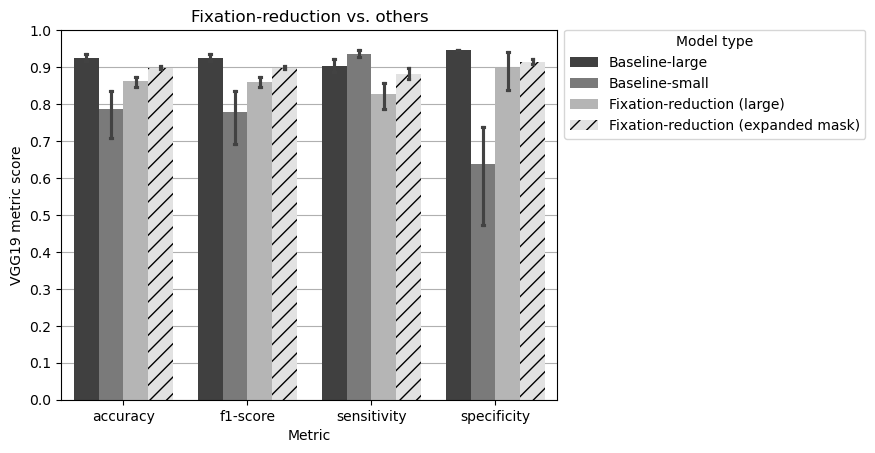

In [60]:
# %%
### Main Text Figure. compare fixation-reuction to baseline and random   
#
from matplotlib.patches import Patch

df_select = df_res # [df_res['metric']!='accuracy']
df_select = df_select[(df_select['case_type']!='Fixation-reduction (small)') & (df_select['case_type']!='Random-small') & (df_select['case_type']!='Random-large')]

hue_order = [
    'Baseline-large', 'Baseline-small',
    'Fixation-reduction (large)',
    'Fixation-reduction (expanded mask)',
]

hue_order_sort = {'Baseline-large':0, 'Baseline-small':1,
    'Fixation-reduction (large)':2,
    'Fixation-reduction (expanded mask)':3,}

df_select['order'] = df_select['case_type'].apply(lambda x: hue_order_sort[x])

palette = sns.color_palette('Greys_r', n_colors=len(hue_order))

g = sns.barplot(
    data=df_select, x='metric', y='value', hue='case_type',
    hue_order=hue_order, capsize=0.05, palette=palette, zorder=2
)

plt.ylim(0.0,1.0) 
plt.xlabel('Metric')
plt.yticks(np.arange(0, 1.01, step=0.1))
plt.grid(axis='y')
plt.ylabel('VGG19 metric score')
# plt.legend(title='Model type', bbox_to_anchor=(1.0,1.02))
plt.title('Fixation-reduction vs. others')

g.legend_.remove()

df_plot = df_select.groupby(['metric','case_type','order'])['value'].mean().reset_index()
df_plot = df_plot.sort_values(['order','metric']).reset_index(drop=True) # note the order of columns

# Apply hatches to bars corresponding to 'Fixation-reduction (expanded mask)'
for bar, (_, row) in zip(g.patches, df_plot.iterrows()):
    if row['case_type'] == 'Fixation-reduction (expanded mask)':
        bar.set_hatch('//')  # You can choose any hatch pattern you like

# Create custom legend handles to include hatching
handles = []
for case_type, color in zip(hue_order, palette):
    if case_type == 'Fixation-reduction (expanded mask)':
        hatch = '//'
    else:
        hatch = ''
    patch = Patch(facecolor=color, hatch=hatch, label=case_type)
    handles.append(patch)

# Add the custom legend
plt.legend(
    handles=handles, title='Model type',
    bbox_to_anchor=(1.0, 1.02), loc='upper left'
)

plt.savefig('results_plots/expX_model_comparison.png', dpi=300, bbox_inches='tight')

Fixation-reduction (expanded mask) model
* VGG19 model based on fixation-reduction (large) model
* Utilized fixation-reduction (large) model to predict tumor tiles from non-overlap tiles comprising a slide's tissue region
* Build a new tumor mask with the predicted tumor tiles (i.e., expaned mask)
* Randomly extract tumor tiles using the expanded masks
* Construct training and validation datasets following the same method as before
* Train a new classification model
* Evaluate on the test dataset used in the paper (50k tumor and 50k normal tiles)


### Add results from models using normal tiles from gaze areas within normal slides

In [2]:
# %%
### get vgg_19 from_gaze model results
res_folder = '/users/PAS1575/chen8028/Pathology/individual_mask/vgg19_testing'

result_files = glob.glob(osp.join(res_folder, 'from_gaze_*_report.csv'))

### extract and save prediction results
res = []
for result_f in result_files:
    model = VGGs
    method = SEP
    method_str = methods[SEP]

    segs = osp.basename(result_f).split('_s')
    case = segs[0].replace('TNsep_','')
    
    case_type = 'Fixation-reduction (normal from gaze)'
    thresh = '0.3'  # only used 0.3 in extracting normal tiles

    seed = segs[1].split('_')[0]
    df = pd.read_csv(result_f)
    accu = df['precision'].values[2]    # this is accuracy
    f1score = df['f1-score'].values[4]  # 3 macro avg, 4 weighted avg
    sensitivity = df['recall'].values[1]
    specificity = df['recall'].values[0]

    res.append([model, method, method_str, case_type, thresh, case, seed, 'accuracy', accu])
    res.append([model, method, method_str, case_type, thresh, case, seed, 'f1-score', f1score])
    res.append([model, method, method_str, case_type, thresh, case, seed, 'sensitivity', sensitivity])
    res.append([model, method, method_str, case_type, thresh, case, seed, 'specificity', specificity])

df_gaze_normal = pd.DataFrame(res, columns=['model','method','method_str','case_type','threshold','case','seed','metric','value'])

df_gaze_normal.to_csv('results/gaze_from_normal_summary.csv', index=False)
df_gaze_normal.sort_values(['case_type','seed'], inplace=True)
df_gaze_normal[df_gaze_normal['metric']=='f1-score']

,model,method,method_str,case_type,threshold,case,seed,metric,value
9,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (normal from gaze),0.3,from_gaze_0.3,16,f1-score,0.831863
5,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (normal from gaze),0.3,from_gaze_0.3,26,f1-score,0.732477
1,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (normal from gaze),0.3,from_gaze_0.3,6,f1-score,0.829143


In [10]:
# merge with df_res
df_res_w_gaze = pd.concat([df_res, df_gaze_normal])
df_res_w_gaze

,model,method,method_str,case_type,threshold,case,seed,metric,value
32,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (expanded mask),0.3,tumor,16,accuracy,0.897430
33,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (expanded mask),0.3,tumor,16,f1-score,0.897413
34,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (expanded mask),0.3,tumor,16,sensitivity,0.884680
35,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (expanded mask),0.3,tumor,16,specificity,0.910180
28,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (expanded mask),0.3,tumor,26,accuracy,0.902730
...,...,...,...,...,...,...,...,...,...
7,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (normal from gaze),0.3,from_gaze_0.3,26,specificity,0.569000
0,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (normal from gaze),0.3,from_gaze_0.3,6,accuracy,0.830570
1,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (normal from gaze),0.3,from_gaze_0.3,6,f1-score,0.829143
2,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (normal from gaze),0.3,from_gaze_0.3,6,sensitivity,0.921960


/tmp/ipykernel_25095/215515366.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['order'] = df_select['case_type'].apply(lambda x: hue_order_sort[x])


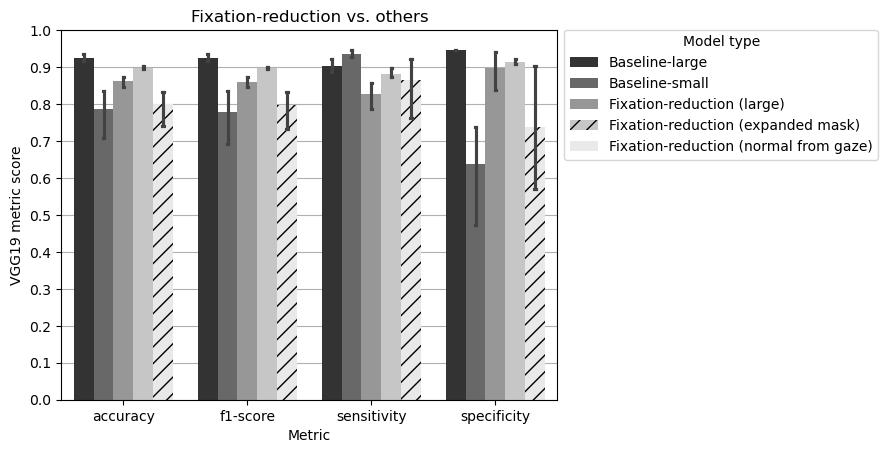

In [12]:
# %%
### Main Text Figure. compare fixation-reuction to baseline and random   
#
from matplotlib.patches import Patch

df_select = df_res_w_gaze  
df_select = df_select[(df_select['case_type']!='Fixation-reduction (small)') & 
                      (df_select['case_type']!='Random-small') & 
                      (df_select['case_type']!='Random-large')]

hue_order = [
    'Baseline-large', 'Baseline-small',
    'Fixation-reduction (large)',
    'Fixation-reduction (expanded mask)',
    'Fixation-reduction (normal from gaze)'
]

hue_order_sort = {'Baseline-large':0, 'Baseline-small':1,
    'Fixation-reduction (large)':2,
    'Fixation-reduction (expanded mask)':3,
    'Fixation-reduction (normal from gaze)':4}

df_select['order'] = df_select['case_type'].apply(lambda x: hue_order_sort[x])

palette = sns.color_palette('Greys_r', n_colors=len(hue_order))

g = sns.barplot(
    data=df_select, x='metric', y='value', hue='case_type',
    hue_order=hue_order, capsize=0.05, palette=palette, zorder=2
)

plt.ylim(0.0,1.0) 
plt.xlabel('Metric')
plt.yticks(np.arange(0, 1.01, step=0.1))
plt.grid(axis='y')
plt.ylabel('VGG19 metric score')
# plt.legend(title='Model type', bbox_to_anchor=(1.0,1.02))
plt.title('Fixation-reduction vs. others')

g.legend_.remove()

df_plot = df_select.groupby(['metric','case_type','order'])['value'].mean().reset_index()
df_plot = df_plot.sort_values(['order','metric']).reset_index(drop=True) # note the order of columns

# Apply hatches to bars corresponding to 'Fixation-reduction (normal from gaze)'
for bar, (_, row) in zip(g.patches, df_plot.iterrows()):
    if row['case_type'] == 'Fixation-reduction (normal from gaze)':
        bar.set_hatch('//')  # You can choose any hatch pattern you like

# Create custom legend handles to include hatching
handles = []
for case_type, color in zip(hue_order, palette):
    if case_type == 'Fixation-reduction (expanded mask)':
        hatch = '//'
    else:
        hatch = ''
    patch = Patch(facecolor=color, hatch=hatch, label=case_type)
    handles.append(patch)

# Add the custom legend
plt.legend(
    handles=handles, title='Model type',
    bbox_to_anchor=(1.0, 1.02), loc='upper left'
)

plt.savefig('results_plots/expX_and_normal_gaze_model_comparison.png', dpi=300, bbox_inches='tight')

### Evaluate models using certain portion of normal tiles from gaze areas within normal slides

In [5]:
# %%
### get vgg_19 from_gaze model results
res_folder = '/users/PAS1575/chen8028/Pathology/individual_mask/vgg19_testing'

result_files = glob.glob(osp.join(res_folder, 'normal_gaze_*_report.csv'))

### extract and save prediction results
res = []
for result_f in result_files:
    model = VGGs
    method = SEP
    method_str = methods[SEP]

    segs = osp.basename(result_f).split('_s')
    case = segs[0].replace('TNsep_','')
    portion = case.split('gaze_')[1].split('_')[0]
    
    case_type = f'Fixation-reduction ({portion} normal from gaze)'
    thresh = '0.3'  # only used 0.3 in extracting normal tiles

    seed = segs[1].split('_')[0]
    df = pd.read_csv(result_f)
    accu = df['precision'].values[2]    # this is accuracy
    f1score = df['f1-score'].values[4]  # 3 macro avg, 4 weighted avg
    sensitivity = df['recall'].values[1]
    specificity = df['recall'].values[0]

    res.append([model, method, method_str, case_type, thresh, case, seed, 'accuracy', accu])
    res.append([model, method, method_str, case_type, thresh, case, seed, 'f1-score', f1score])
    res.append([model, method, method_str, case_type, thresh, case, seed, 'sensitivity', sensitivity])
    res.append([model, method, method_str, case_type, thresh, case, seed, 'specificity', specificity])

df_gaze_normal_partial = pd.DataFrame(res, columns=['model','method','method_str','case_type','threshold','case','seed','metric','value'])

df_gaze_normal_partial.to_csv('results/gaze_from_normal_summary.csv', index=False)
df_gaze_normal_partial.sort_values(['case_type','seed'], inplace=True)
df_gaze_normal_partial[df_gaze_normal_partial['metric']=='f1-score']

,model,method,method_str,case_type,threshold,case,seed,metric,value
9,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (0.25 normal from gaze),0.3,normal_gaze_0.25_0.3,16,f1-score,0.844020
25,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (0.25 normal from gaze),0.3,normal_gaze_0.25_0.3,26,f1-score,0.857389
21,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (0.25 normal from gaze),0.3,normal_gaze_0.25_0.3,6,f1-score,0.850065
13,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (0.5 normal from gaze),0.3,normal_gaze_0.5_0.3,16,f1-score,0.855009
33,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (0.5 normal from gaze),0.3,normal_gaze_0.5_0.3,26,f1-score,0.837927
1,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (0.5 normal from gaze),0.3,normal_gaze_0.5_0.3,6,f1-score,0.839794
17,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (0.75 normal from gaze),0.3,normal_gaze_0.75_0.3,16,f1-score,0.825295
29,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (0.75 normal from gaze),0.3,normal_gaze_0.75_0.3,26,f1-score,0.839582
5,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (0.75 normal from gaze),0.3,normal_gaze_0.75_0.3,6,f1-score,0.836691


In [31]:
# merge with df_res
df_res_gaze = pd.concat([df_gaze_normal, df_gaze_normal_partial, df_res[df_res['case_type']=='Fixation-reduction (large)']])
df_res_gaze

,model,method,method_str,case_type,threshold,case,seed,metric,value
8,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (normal from gaze),0.3,from_gaze_0.3,16,accuracy,0.832720
9,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (normal from gaze),0.3,from_gaze_0.3,16,f1-score,0.831863
10,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (normal from gaze),0.3,from_gaze_0.3,16,sensitivity,0.761320
11,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (normal from gaze),0.3,from_gaze_0.3,16,specificity,0.904120
4,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (normal from gaze),0.3,from_gaze_0.3,26,accuracy,0.740330
5,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (normal from gaze),0.3,from_gaze_0.3,26,f1-score,0.732477
6,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (normal from gaze),0.3,from_gaze_0.3,26,sensitivity,0.911660
7,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (normal from gaze),0.3,from_gaze_0.3,26,specificity,0.569000
0,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (normal from gaze),0.3,from_gaze_0.3,6,accuracy,0.830570
1,VGG19,Standalone,Normal_tiles_from_normal_slides,Fixation-reduction (normal from gaze),0.3,from_gaze_0.3,6,f1-score,0.829143


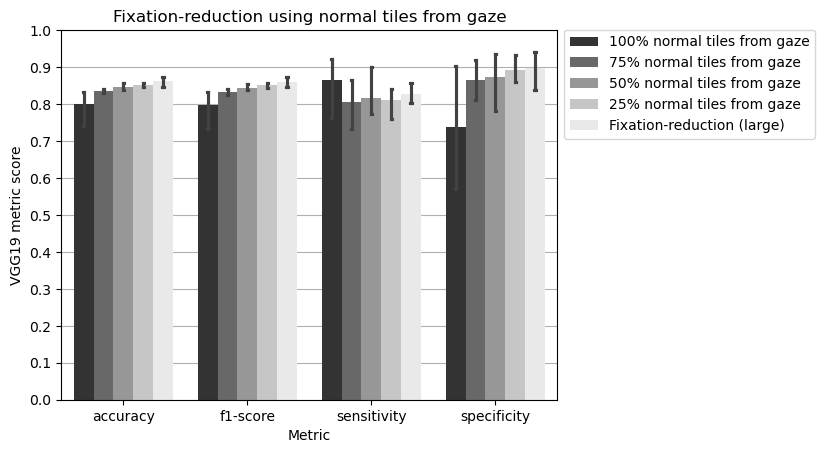

In [33]:
# %%
### Main Text Figure. compare fixation-reuction to baseline and random   
#
from matplotlib.patches import Patch

def change_name(x):
    if '0.75 normal from gaze' in x:
        return '75% normal tiles from gaze'
    elif '0.5 normal from gaze' in x:
        return '50% normal tiles from gaze'
    elif '0.25 normal from gaze' in x:
        return '25% normal tiles from gaze'
    elif 'Fixation-reduction (normal from gaze)' in x:
        return '100% normal tiles from gaze'
    elif 'Fixation-reduction (large)' in x:
        return 'Fixation-reduction (large)'

df_select = df_res_gaze.copy() 
df_select['case_type'] = df_select['case_type'].apply(lambda x: change_name(x))

hue_order = [
    '100% normal tiles from gaze',
    '75% normal tiles from gaze',
    '50% normal tiles from gaze',
    '25% normal tiles from gaze',
    'Fixation-reduction (large)'
]

hue_order_sort = {'100% normal tiles from gaze':0, 
    '75% normal tiles from gaze':1,
    '50% normal tiles from gaze':2,
    '25% normal tiles from gaze':3,
    'Fixation-reduction (large)':4}

df_select['order'] = df_select['case_type'].apply(lambda x: hue_order_sort[x])

palette = sns.color_palette('Greys_r', n_colors=len(hue_order))

g = sns.barplot(
    data=df_select, x='metric', y='value', hue='case_type',
    hue_order=hue_order, capsize=0.05, palette=palette, zorder=2
)

plt.ylim(0.0,1.0) 
plt.xlabel('Metric')
plt.yticks(np.arange(0, 1.01, step=0.1))
plt.grid(axis='y')
plt.ylabel('VGG19 metric score')
# plt.legend(title='Model type', bbox_to_anchor=(1.0,1.02))
plt.title('Fixation-reduction using normal tiles from gaze')

g.legend_.remove()

df_plot = df_select.groupby(['metric','case_type','order'])['value'].mean().reset_index()
df_plot = df_plot.sort_values(['order','metric']).reset_index(drop=True) # note the order of columns

# # Apply hatches to bars corresponding to 'Fixation-reduction (normal from gaze)'
# for bar, (_, row) in zip(g.patches, df_plot.iterrows()):
#     if row['case_type'] == 'Fixation-reduction (normal from gaze)':
#         bar.set_hatch('//')  # You can choose any hatch pattern you like

# # Create custom legend handles to include hatching
# handles = []
# for case_type, color in zip(hue_order, palette):
#     if case_type == 'Fixation-reduction (expanded mask)':
#         hatch = '//'
#     else:
#         hatch = ''
#     patch = Patch(facecolor=color, hatch=hatch, label=case_type)
#     handles.append(patch)

# Add the custom legend
plt.legend(
    # handles=handles, title='Model type',
    bbox_to_anchor=(1.0, 1.02), loc='upper left'
)

plt.savefig('results_plots/expX_normal_gaze_proportion_comparison.png', dpi=300, bbox_inches='tight')

In [20]:
df_select['case_type']

8     100% normal tiles from gaze
9     100% normal tiles from gaze
10    100% normal tiles from gaze
11    100% normal tiles from gaze
4     100% normal tiles from gaze
5     100% normal tiles from gaze
6     100% normal tiles from gaze
7     100% normal tiles from gaze
0     100% normal tiles from gaze
1     100% normal tiles from gaze
2     100% normal tiles from gaze
3     100% normal tiles from gaze
8     100% normal tiles from gaze
9     100% normal tiles from gaze
10    100% normal tiles from gaze
11    100% normal tiles from gaze
24    100% normal tiles from gaze
25    100% normal tiles from gaze
26    100% normal tiles from gaze
27    100% normal tiles from gaze
20    100% normal tiles from gaze
21    100% normal tiles from gaze
22    100% normal tiles from gaze
23    100% normal tiles from gaze
12    100% normal tiles from gaze
13    100% normal tiles from gaze
14    100% normal tiles from gaze
15    100% normal tiles from gaze
32    100% normal tiles from gaze
33    100% nor

### Plot all models in one plot

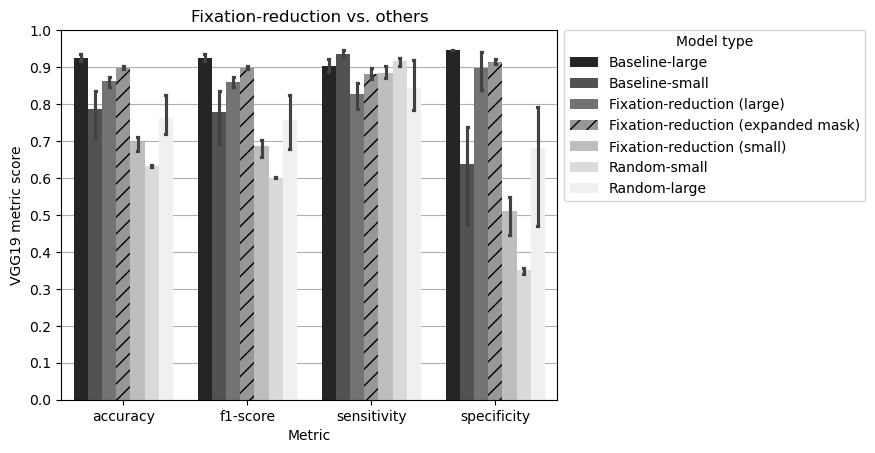

In [66]:
# %%
### Main Text Figure. compare fixation-reuction to baseline and random   
#
import matplotlib.patches as mpatches

df_select = df_res

hue_order = [
    'Baseline-large', 'Baseline-small',
    'Fixation-reduction (large)',
    'Fixation-reduction (expanded mask)',
    'Fixation-reduction (small)',
    'Random-small', 'Random-large'
]

hue_order_sort = {'Baseline-large':0, 'Baseline-small':1,
    'Fixation-reduction (large)':2,
    'Fixation-reduction (expanded mask)':3,
    'Fixation-reduction (small)':4,
    'Random-small':5, 'Random-large':6}

df_select['order'] = df_select['case_type'].apply(lambda x: hue_order_sort[x])

palette = sns.color_palette('Greys_r', n_colors=len(hue_order))

g = sns.barplot(
    data=df_select, x='metric', y='value', hue='case_type',
    hue_order=hue_order, capsize=0.05, palette=palette, zorder=2
)

plt.ylim(0.0,1.0) 
plt.xlabel('Metric')
plt.yticks(np.arange(0, 1.01, step=0.1))
plt.grid(axis='y')
plt.ylabel('VGG19 metric score')
plt.title('Fixation-reduction vs. others')

g.legend_.remove()

df_plot = df_select.groupby(['metric','case_type','order'])['value'].mean().reset_index()
df_plot = df_plot.sort_values(['order','metric']).reset_index(drop=True) # note the order of columns

# Apply hatches to bars corresponding to 'Fixation-reduction (expanded mask)'
for bar, (_, row) in zip(g.patches, df_plot.iterrows()):
    if row['case_type'] == 'Fixation-reduction (expanded mask)':
        bar.set_hatch('//')  # You can choose any hatch pattern you like

# Create custom legend handles to include hatching
handles = []
for case_type, color in zip(hue_order, palette):
    if case_type == 'Fixation-reduction (expanded mask)':
        hatch = '//'
    else:
        hatch = ''
    patch = Patch(facecolor=color, hatch=hatch, label=case_type)
    handles.append(patch)

# Add the custom legend
plt.legend(
    handles=handles, title='Model type',
    bbox_to_anchor=(1.0, 1.02), loc='upper left'
)

plt.savefig('results_plots/expX_all_model_comparison.png', dpi=300, bbox_inches='tight')

In [61]:
# %%
### calculate values for paper
res = df_select.groupby(['metric','case_type'], as_index=False).agg({'value':['mean','std']})
res.columns = ['metric','case_type','mean','std']
res.to_csv('./results/expX_metrics_stat.csv', index=False)
res

,metric,case_type,mean,std
0,accuracy,Baseline-large,0.924255,0.009458
1,accuracy,Baseline-small,0.786816,0.067919
2,accuracy,Fixation-reduction (expanded mask),0.898210,0.004185
3,accuracy,Fixation-reduction (large),0.861164,0.012847
4,f1-score,Baseline-large,0.924212,0.009489
5,f1-score,Baseline-small,0.779813,0.076629
6,f1-score,Fixation-reduction (expanded mask),0.898176,0.004221
7,f1-score,Fixation-reduction (large),0.860833,0.012699
8,sensitivity,Baseline-large,0.902016,0.017795
9,sensitivity,Baseline-small,0.935104,0.009139


In [62]:
from scipy.stats import ttest_ind

for metric in ['accuracy', 'f1-score', 'sensitivity', 'specificity']:
    df_stat = df_select[df_select['metric']==metric]
    group_large = df_stat[df_stat['case_type'] == 'Fixation-reduction (large)']['value']
    group_expanded = df_stat[df_stat['case_type'] == 'Fixation-reduction (expanded mask)']['value']

    t_stat, p_value = ttest_ind(group_expanded, group_large, equal_var=False)
    print(f"t-test {metric}:\t t={t_stat:.3f}, p={p_value:.3f}")

t-test accuracy:	 t=4.749, p=0.028
t-test f1-score:	 t=4.833, p=0.027
t-test sensitivity:	 t=2.557, p=0.093
t-test specificity:	 t=0.578, p=0.620
